## 1. Loading Package

In [1]:
# Import package
import pandas as pd
import numpy as np
import nltk
import re
import string
from  nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from langdetect import detect
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import spacy
# 
import json
from itertools import chain
import os
from pprint import pprint
import matplotlib.pyplot as plt
# LDA
import gensim
from gensim.utils import simple_preprocess
# EDAq
from wordcloud import WordCloud
import gensim.corpora as corpora
from pprint import pprint

## Plotting tools
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
import matplotlib.pyplot as plt
%matplotlib inline
from gensim.models import CoherenceModel

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
gensim.__version__ 

'3.8.3'

## 2. Import Data

In [2]:
df = pd.read_csv ('../../../Data/Year_and_Text/USCA.csv')
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
# convert
listOfText = list(sent_to_words(df["clean_text"]))
#listOfText = []
#for i in range(len(clean_data)):
#    listOfText.append(" ".join(clean_data[i]))

<ipython-input-2-f31468d50845>:1: DtypeWarning: Columns (6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv ('../Data/USCA.csv')


In [3]:
listOfText[:5]

[['vacation', 'banana_boat', 'sunscreen', 'break', 'rash', 'turn', 'blister'],
 ['helmet',
  'sell',
  'online',
  'as_well',
  'rate',
  'world',
  'govern',
  'body',
  'ski',
  'racing',
  'fis',
  'rating',
  'competitive',
  'skiing',
  'globally',
  'experienced',
  'user',
  'various',
  'helmet',
  'wear',
  'life',
  'ski',
  'racer',
  'rider',
  'high',
  'performance',
  'jet',
  'pilot',
  'helmet',
  'secure',
  'head',
  'chin_strap',
  'helmet',
  'adjust',
  'correct',
  'tension',
  'loose',
  'ski',
  'mean',
  'helmet',
  'secure',
  'event',
  'mishap',
  'purpose',
  'helmet',
  'protect',
  'head',
  'mishap',
  'stop',
  'partially',
  'ski_slope',
  'adjust',
  'correct',
  'tension',
  'flaw',
  'manufacturer',
  'responsive',
  'claim',
  'understand',
  'photo',
  'purchaser',
  'helmet',
  'risk',
  'helmet',
  'wear',
  'life',
  'helmet',
  'ever',
  'flaw',
  'fit',
  'purpose'],
 ['renseignement',
  'husband',
  'baby',
  'strap',
  'first',
  'swivel',

## 3. Create Dictionary and Corpus

In [4]:
# import gensim.corpora as corpora
# Create Corpus
texts = listOfText
# Create Dictionary
id2word = corpora.Dictionary(texts)
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

#### (Optional) Check word frequency and Remove High / Low Freq Words

In [5]:
#dict_corpus = {}
#
#for i in range(len(corpus)):
#    for idx, freq in corpus[i]:
#        if id2word[idx] in dict_corpus:
#            dict_corpus[id2word[idx]] += freq
#        else:
#            dict_corpus[id2word[idx]] = freq
#dict_df = pd.DataFrame.from_dict(dict_corpus, orient='index', columns=['freq'])
#

In [6]:
## Top ten high frequency words
#dict_df.sort_values("freq", ascending=False).head(10)

In [7]:
## Distribution of words frequency
#import seaborn as sns
#sns.set()
#plt.figure(figsize=(8,6))
#sns.distplot(dict_df['freq'], bins=100)

In [8]:
## Remove High Freq
#extension = dict_df[dict_df.freq>5000].index.tolist()
#ids=[id2word.token2id[extension[i]] for i in range(len(extension))]
#id2word.filter_tokens(bad_ids=ids)
#id2word

In [9]:
## Remove Low Freq
## Filter out words that occur less than 10 documents, or more than
## 50% of the documents.
#id2word.filter_extremes(no_below=10, no_above=0.5)
#print('Total Vocabulary Size:', len(id2word))

In [10]:
## Recreate Corpus
## Create Corpus: Term Document Frequency
#corpus = [id2word.doc2bow(text) for text in texts]

## LDA
---

#### 1. LDA model training
With 10 topics

In [11]:
# number of topics
num_topics = 10

# LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

#### 2. View Topics
Detail of those 10 topics

In [12]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]


[(0,
  '0.484*"bicycle" + 0.025*"plastic" + 0.024*"cut" + 0.018*"sidewalk" + '
  '0.016*"fatal" + 0.016*"metal" + 0.014*"piece" + 0.014*"outside" + '
  '0.012*"surgery" + 0.012*"loose"'),
 (1,
  '0.080*"fire" + 0.069*"accident" + 0.058*"scooter" + 0.029*"home" + '
  '0.029*"burn" + 0.025*"break" + 0.023*"leave" + 0.021*"boy" + 0.020*"catch" '
  '+ 0.019*"damage"'),
 (2,
  '0.127*"driver" + 0.123*"bicyclist" + 0.109*"car" + 0.086*"passenger" + '
  '0.034*"truck" + 0.034*"collide" + 0.032*"street" + 0.023*"seat" + '
  '0.017*"pedal" + 0.016*"suv"'),
 (3,
  '0.170*"hospital" + 0.094*"die" + 0.063*"injure" + 0.057*"death" + '
  '0.042*"kill" + 0.033*"child" + 0.022*"female" + 0.020*"son" + '
  '0.016*"pronounce_dead" + 0.016*"treat"'),
 (4,
  '0.087*"side" + 0.044*"back" + 0.033*"stop" + 0.021*"redacted" + '
  '0.021*"charge" + 0.016*"trail" + 0.015*"fail" + 0.014*"condition" + '
  '0.013*"end" + 0.013*"new"'),
 (5,
  '0.088*"injury" + 0.075*"ride" + 0.054*"strike" + 0.048*"decedent" + '
 

#### 3. Metrics
Evaluate model performance

In [74]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_npmi')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.689346736210648

Coherence Score:  0.008142587730041262


#### 4. LDA Visual Analysis
Visualize the topics find by LDA

In [14]:
id2word

In [15]:
# Visualize the topics
pyLDAvis.enable_notebook()
# Saving Path
LDAvis_data_filepath = os.path.join('..\Graph\ldavis_prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, '..\Graph\ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

/Users/hanjunwei/Desktop/UL/ul_env/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.318406  0.041469       1        1  21.964664
1     -0.105367  0.322986       2        1  19.632632
4     -0.137997  0.225219       3        1  12.142765
3      0.194661  0.055942       4        1  12.061018
8      0.064485 -0.099352       5        1   6.813658
7     -0.121848 -0.057104       6        1   5.971488
9     -0.105303 -0.142775       7        1   5.890166
2      0.129741 -0.062966       8        1   5.255053
6     -0.115560 -0.133277       9        1   5.248626
0     -0.121217 -0.150142      10        1   5.019930, topic_info=             Term          Freq         Total Category  logprob  loglift
2260      bicycle  93137.000000  93137.000000  Default  30.0000  30.0000
386       vehicle  69408.000000  69408.000000  Default  29.0000  29.0000
82       hospital  78626.000000  78626.000000  Default  28.0000  28.0000
226          bike  50491.000000  50491.000000  Default  27.0000  27.0000
294        injury  73877.000000  73877.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
144           add    777.038772    778.090545  Topic10  -5.5110   2.9904
748          city    756.227912    757.279186  Topic10  -5.5382   2.9904
4050  fortunately    744.312392    745.363969  Topic10  -5.5540   2.9903
191       support    741.338133    742.389193  Topic10  -5.5580   2.9903
570         mouth    735.781663    736.832551  Topic10  -5.5656   2.9903

[342 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
2037      2  0.999971    accident
144      10  0.998598         add
328       4  0.999578       adult
2001      7  0.999601         air
1301      5  0.999301       alert
...     ...       ...         ...
2808      8  0.998798  windshield
3834      7  0.999609     witness
801       7  0.999891       woman
1997      9  0.999610         yet
7647      1  0.999806         yof

[341 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 2, 5, 4, 9, 8, 10, 3, 7, 1])

## Mallet LDA

#### 1. Mallet LDA 
More advanced topic model

In [16]:
from gensim.models import Phrases  #https://radimrehurek.com/gensim/corpora/dictionary.html
from gensim import corpora
from gensim import models
from gensim.models.coherencemodel import CoherenceModel

# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
os.environ.update({'MALLET_HOME':r'/Users/hanjunwei/Desktop/UL/USCA_NLP/mallet-2.0.8/bin'})
#mallet_path = 'C:/Users/esong/Code/test/mallet-2.0.8/bin/mallet.bat' # update this path
mallet_path = r'/Users/hanjunwei/Desktop/UL/USCA_NLP/mallet-2.0.8/bin/mallet' # update this path
ldamallet = models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)

#### 2. Topic Detail

In [72]:
ldamallet.show_topics(num_topics=10, num_words=10, formatted=True)[1][1]

'0.136*"decedent" + 0.100*"autopsy" + 0.077*"death" + 0.049*"drown" + 0.047*"male" + 0.037*"bed" + 0.029*"pool" + 0.029*"female" + 0.028*"residence" + 0.020*"unresponsive"'

In [51]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

[(0,
  [('fall', 0.161904906393179),
   ('head', 0.08795400066753649),
   ('floor', 0.07492186788846072),
   ('decedent', 0.07152653457535577),
   ('injury', 0.04657584124768638),
   ('trauma', 0.027860545559365235),
   ('fracture', 0.019358558121188214),
   ('strike', 0.016503322511150893),
   ('neck', 0.016372849470522196),
   ('left', 0.014524987104408775)]),
 (1,
  [('decedent', 0.13636246080237935),
   ('autopsy', 0.09978663563184949),
   ('death', 0.07686936281640966),
   ('drown', 0.048902466621407556),
   ('male', 0.046791452494100154),
   ('bed', 0.037015485080658196),
   ('pool', 0.02905634758995248),
   ('female', 0.028975527753531828),
   ('residence', 0.027701807131542366),
   ('unresponsive', 0.019881679759480166)]),
 (2,
  [('recall', 0.019692355173958426),
   ('company', 0.01421415972068919),
   ('manufacturer', 0.011500781221534709),
   ('redacted', 0.009869753545502671),
   ('part', 0.00973687087018863),
   ('model', 0.009181764210409),
   ('sell', 0.00902101903865814

#### 3. Coherence Score

In [73]:
# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=texts, dictionary=id2word, coherence='c_npmi')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)


Coherence Score:  0.10234574664014864


## Optimal Number of Topics
Find the number of Topics we should cluster

#### 1. Find the optimal number of topics

In [166]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=25, step=1, metric = 'c_npmi'):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    npmi = []
    for num_topics in range(start, limit, step):
        for i in range(3):
            model = models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
            model_list.append(model)
            coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence = metric)
            npmi.append(coherencemodel.get_coherence())
        coherence_values.append(np.mean(npmi))
        npmi = []
    return model_list, coherence_values

# Can take a long time to run.
#model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, 
#                                                        start=20, limit=50, step=1, metric = 'c_npmi')
model_list_2, coherence_values_2 = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, 
                                                        start=20, limit=50, step=1, metric = 'c_v')

In [114]:
max(coherence_values)

0.12904034806009326

In [117]:
len(model_list)

90

#### 2. Coherence Plot (npmi)

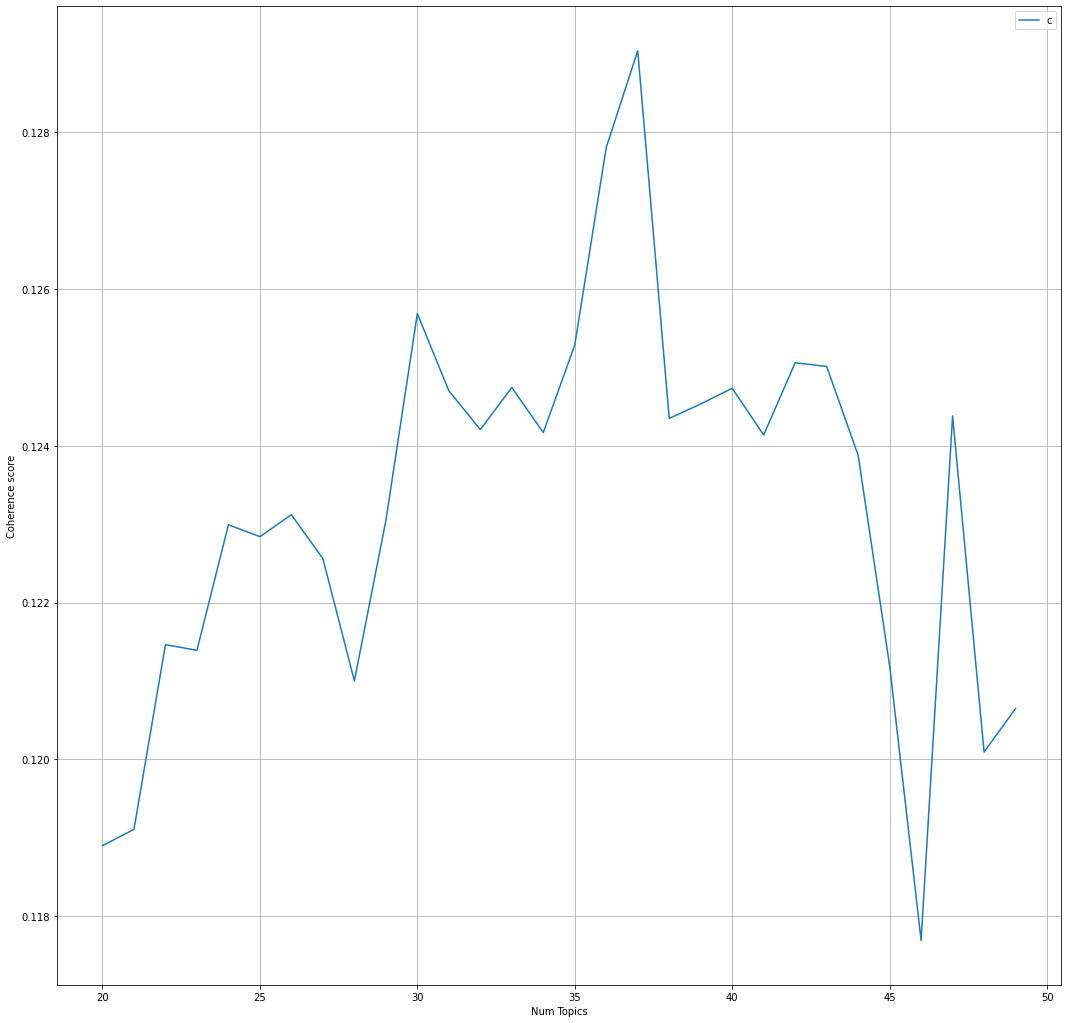

In [113]:
# Show graph
start=20; limit=50; step=1
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.grid()
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

#### 3. Topic Number and their Cohenrence Score

In [168]:
# Print the coherence scores
for m, npmi in zip(x, coherence_values):
    if npmi == max(coherence_values):
        #print("This is the best!!!!!!!")
        best = ("Num Topics =", m, " has Coherence Value of", round(npmi, 4))
    #print("Num Topics =", m, " has Coherence Value of", round(npmi, 4))
best

('Num Topics =', 37, ' has Coherence Value of', 0.129)

#### 4. Coherence Plot (CV)

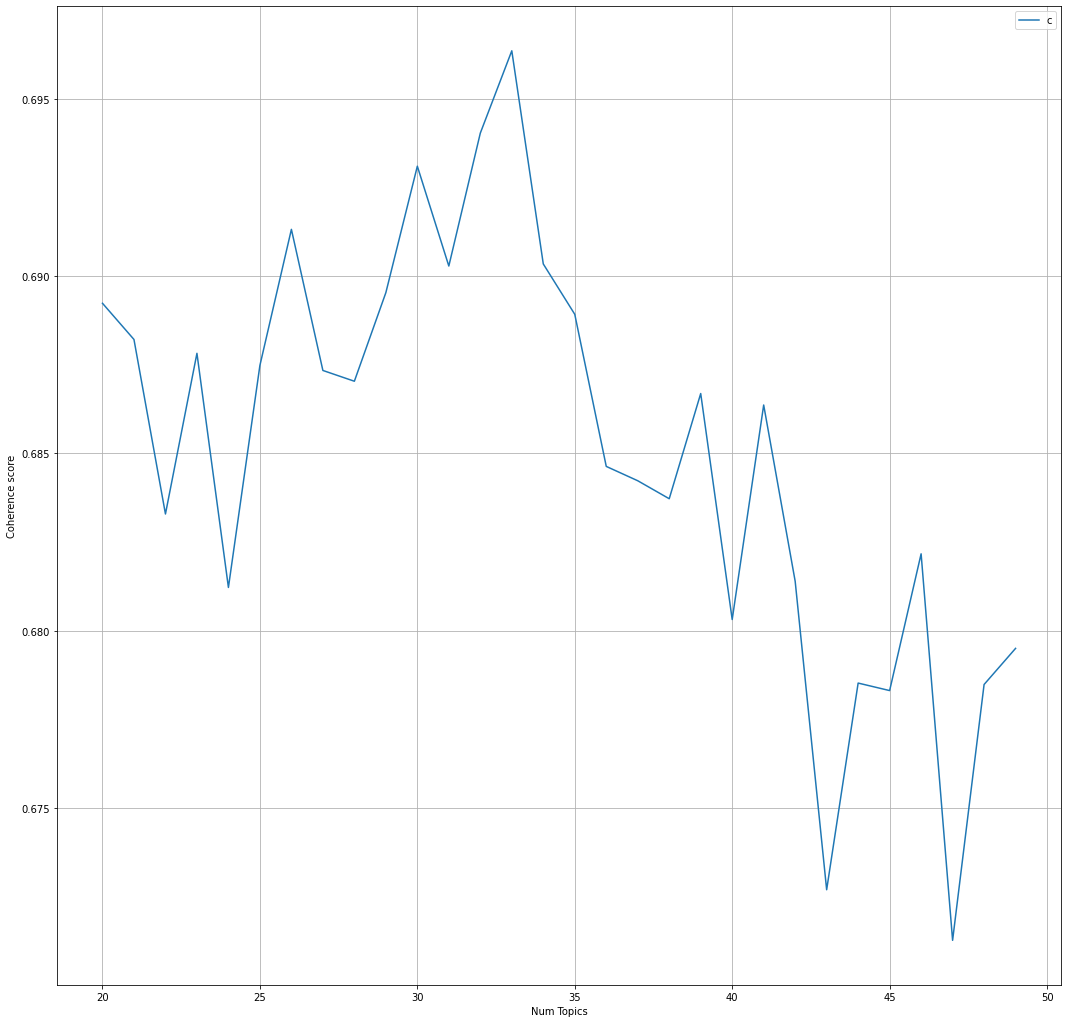

In [170]:
# Show graph
start=20; limit=50; step=1
x = range(start, limit, step)
plt.plot(x, coherence_values_2)
plt.grid()
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [171]:
# Print the coherence scores
for m, cv in zip(x, coherence_values_2):
    if cv == max(coherence_values_2):
        #print("This is the best!!!!!!!")
        best = ("Num Topics =", m, " has Coherence Value of", round(cv, 4))
    #print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
best

('Num Topics =', 33, ' has Coherence Value of', 0.6963)

#### 4. Optimal Topic Number and Its Result 

In [172]:
num_topics = 33
# Select the model and print the topics
optimal_model = model_list[39]
model_topics = optimal_model.show_topics(formatted=False, num_topics = num_topics)
pprint(optimal_model.print_topics(num_words=15))

[(8,
  '0.034*"seat" + 0.025*"wheel" + 0.024*"stop" + 0.018*"stroller" + '
  '0.018*"release" + 0.017*"fail" + 0.017*"push" + 0.016*"back" + '
  '0.016*"mower" + 0.016*"lock" + 0.014*"pull" + 0.014*"position" + '
  '0.013*"lawn_mower" + 0.012*"rear" + 0.011*"tractor"'),
 (31,
  '0.223*"fire" + 0.188*"home" + 0.123*"house" + 0.032*"destroy" + '
  '0.031*"space_heater" + 0.027*"escape" + 0.025*"family" + 0.025*"bedroom" + '
  '0.021*"mobile" + 0.020*"tv" + 0.017*"damage" + 0.015*"safely" + '
  '0.013*"living_room" + 0.012*"kill" + 0.012*"blaze"'),
 (18,
  '0.058*"chair" + 0.054*"break" + 0.054*"back" + 0.048*"side" + 0.043*"arm" + '
  '0.038*"sit" + 0.031*"stand" + 0.031*"table" + 0.029*"ground" + 0.027*"hit" '
  '+ 0.025*"leg" + 0.020*"injure" + 0.019*"collapse" + 0.018*"attempt" + '
  '0.018*"hurt"'),
 (16,
  '0.069*"battery" + 0.057*"plug" + 0.047*"phone" + 0.039*"device" + '
  '0.036*"cord" + 0.035*"charge" + 0.031*"power" + 0.027*"hot" + '
  '0.023*"charger" + 0.022*"damage" + 0.020

In [173]:
print(len(model_topics))

33


#### 5. Topic Visualization

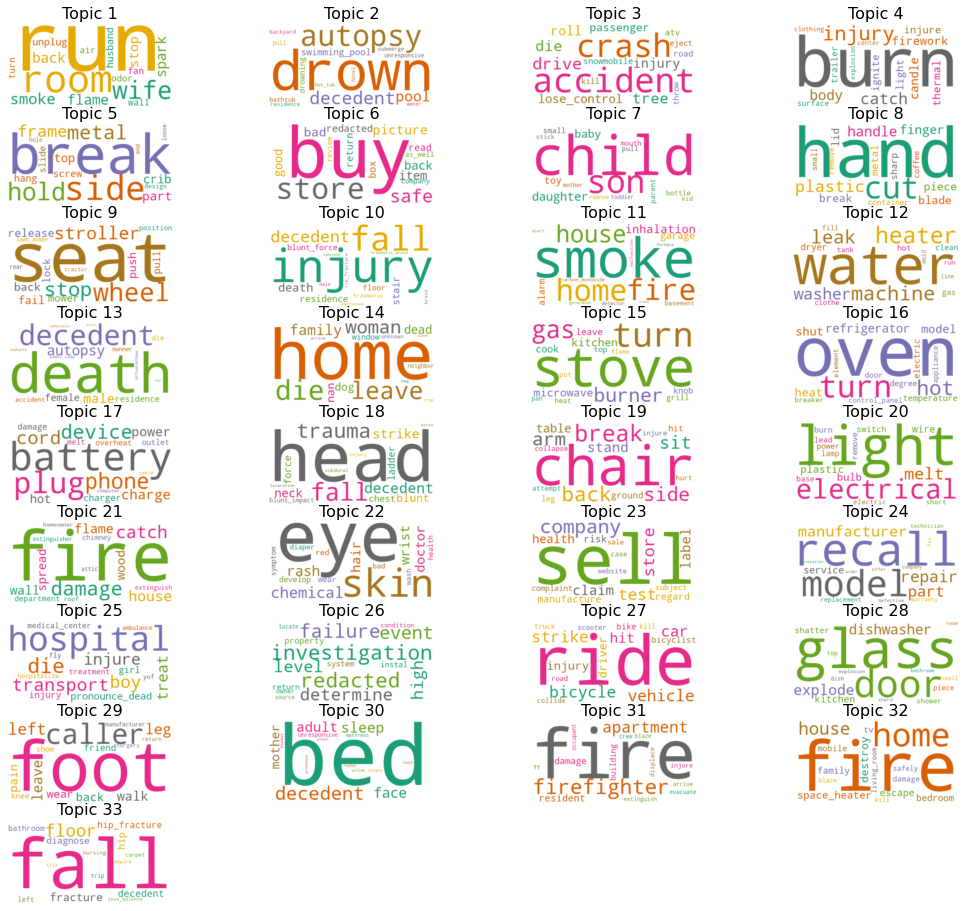

'\nfor i, ax in enumerate(axes.flatten()):\n    ##fig.add_subplot(ax)\n     \n    topic_words = dict(topics[i][1])\n    cloud.generate_from_frequencies(topic_words, max_font_size=300)\n    #plt.gca().imshow(cloud, interpolation="bilinear")\n    plt.imshow(cloud, interpolation="bilinear")\n    plt.gca().set_title(\'Topic \' + str(i), fontdict=dict(size=16))\n    #plt.gca().axis(\'off\')\n\nplt.subplots_adjust(wspace=0, hspace=0)\nplt.axis(\'off\')\nplt.margins(x=0, y=0)\nplt.tight_layout()\nplt.show()\n'

In [174]:
#word cloud based on optimal LDA Mallet model
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

from nltk.corpus import stopwords
 
#extra_stopwords = ['would','take','without','even','get','hold','go','much','somewhere', 'might','must','make','therein','come','amp','dont','https']
#my_stopwords = stopwords.words('english') + extra_stopwords + stopwords.words('longStopWords.txt')
#my_stopwords = stopwords.words('english') + extra_stopwords

cols = [color for nam, color in mcolors.TABLEAU_COLORS.items()]
'''
cloud = WordCloud(stopwords=my_stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=15,
                  colormap='Dark2',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)
'''
topics  = optimal_model.show_topics(formatted=False, num_words = 15, num_topics = num_topics)
#initiate wordcloud object
wc = WordCloud(background_color="white", colormap="Dark2", max_font_size=150, random_state=42)

numOfRows = len(topics) // 4
#fig, axes = plt.subplots(numOfRows, 5, figsize=(10,8), sharex=True, sharey=True)
plt.rcParams['figure.figsize'] = [18,18]
# Create subplots for each topic
for i in range(len(model_topics)):

    #wc.generate(text=topics_df["Terms per Topic"][i])
    topic_words = dict(topics[i][1])
    wc.generate_from_frequencies(topic_words, max_font_size=200)
    plt.subplot(10, 4, i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title('Topic ' + str(i+1), fontdict=dict(size=16))

plt.show()
'''
for i, ax in enumerate(axes.flatten()):
    ##fig.add_subplot(ax)
     
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    #plt.gca().imshow(cloud, interpolation="bilinear")
    plt.imshow(cloud, interpolation="bilinear")
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    #plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()
'''

#### 6. Mallet LDA Visualization
Visulize the Mallet LDA Topic

In [175]:
#convert LDA mallet to LDA model
def convertldaGenToldaMallet(mallet_model):
    model_gensim = models.ldamodel.LdaModel(
        id2word=mallet_model.id2word, num_topics=mallet_model.num_topics,
        alpha=mallet_model.alpha, eta=0,
    )
    model_gensim.state.sstats[...] = mallet_model.wordtopics
    model_gensim.sync_state()
    return model_gensim

optimal_model = convertldaGenToldaMallet(optimal_model)

In [176]:
#conda install -c conda-forge pyldavis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

# Saving Path
LDAvis_data_filepath = os.path.join('..\Graph\ldavis_prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True

# # if you want to execute visualization prep yourself

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(optimal_model, corpus, dictionary=lda_model.id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk

with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, '..\Graph\ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

/Users/hanjunwei/Desktop/UL/ul_env/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Users/hanjunwei/Desktop/UL/ul_env/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/hanjunwei/Desktop/UL/ul_env/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
22     0.031694 -0.163510       1        1  4.036397
5      0.035592 -0.190722       2        1  4.026452
23     0.031180 -0.159466       3        1  3.985867
21     0.008718 -0.124083       4        1  3.585525
15     0.035847 -0.132992       5        1  3.433297
4      0.016557 -0.170832       6        1  3.368578
7      0.012849 -0.132887       7        1  3.268149
11     0.021146 -0.096816       8        1  3.233812
27     0.014813 -0.113967       9        1  3.199046
25     0.055683 -0.108928      10        1  3.197781
19     0.037062 -0.115244      11        1  3.197249
6     -0.008777 -0.072951      12        1  3.185025
8      0.010076 -0.135645      13        1  3.157323
14     0.033249 -0.078912      14        1  3.128906
16     0.069217 -0.085748      15        1  3.125826
0      0.073986 -0.068213      16        1  3.099028
28     0.000748 -0.126116      17        1  3.027123
18    -0.031943 -0.067087      18        1  2.905634
20     0.280794  0.236417      19        1  2.898426
30     0.258737  0.237181      20        1  2.744306
31     0.294239  0.273727      21        1  2.742442
3     -0.028412  0.040818      22        1  2.730905
10     0.240122  0.205395      23        1  2.727626
26    -0.084925  0.065915      24        1  2.726678
32    -0.209598  0.111378      25        1  2.699006
2     -0.084749  0.077000      26        1  2.656239
13     0.092615  0.117524      27        1  2.645121
24    -0.044324  0.072522      28        1  2.636958
29    -0.150604  0.080943      29        1  2.619188
17    -0.237407  0.139260      30        1  2.599135
9     -0.313638  0.197478      31        1  2.513543
12    -0.255403  0.170842      32        1  2.475239
1     -0.205145  0.117719      33        1  2.424170, topic_info=                Term           Freq          Total Category  logprob  loglift
206             fire  105529.000000  105529.000000  Default  30.0000  30.0000
411             home   58108.000000   58108.000000  Default  29.0000  29.0000
62              fall   49695.000000   49695.000000  Default  28.0000  28.0000
7644        decedent   61978.000000   61978.000000  Default  27.0000  27.0000
82          hospital   32905.000000   32905.000000  Default  26.0000  26.0000
...              ...            ...            ...      ...      ...      ...
4857       pronounce     819.119167    3058.006489  Topic33  -4.7303   2.4024
243           ground     809.832109    4823.527158  Topic33  -4.7417   1.9352
326            water    1163.669253   15025.921766  Topic33  -4.3792   1.1615
7639  pronounce_dead     576.726727    3951.656501  Topic33  -5.0812   1.7952
1393         perform     445.779121    1200.402348  Topic33  -5.3387   2.7291

[2556 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
7233      2  0.005821  abdominal
7233      9  0.005821  abdominal
7233     13  0.005821  abdominal
7233     30  0.087319  abdominal
7233     31  0.896478  abdominal
...     ...       ...        ...
905       8  0.917749  youremail
5727     28  1.057186       yulu
1902     30  1.087359        yyc
388      15  0.914485    zentime
1257      6  0.998183     zipper

[3916 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[23, 6, 24, 22, 16, 5, 8, 12, 28, 26, 20, 7, 9, 15, 17, 1, 29, 19, 21, 31, 32, 4, 11, 27, 33, 3, 14, 25, 30, 18, 10, 13, 2])

#### Output Topic List

In [177]:
model_topics

[(0,
  [('run', 0.05128085527175028),
   ('room', 0.04643916637125212),
   ('wife', 0.04260499654831427),
   ('smoke', 0.03947982163180775),
   ('flame', 0.03221262384088662),
   ('back', 0.032054032874974346),
   ('spark', 0.03150362893445529),
   ('stop', 0.027221672854823964),
   ('unplug', 0.025962274007873574),
   ('husband', 0.025645092076049033)]),
 (1,
  [('drown', 0.15132901831714368),
   ('autopsy', 0.1308910475085283),
   ('decedent', 0.1170856634087294),
   ('pool', 0.08991506687608167),
   ('swimming_pool', 0.05801262492372025),
   ('drowning', 0.0381648843048789),
   ('bathtub', 0.023899320735086684),
   ('unresponsive', 0.019967787437100468),
   ('pull', 0.01994777963405728),
   ('residence', 0.016566460919758705)]),
 (2,
  [('accident', 0.06211653783493362),
   ('crash', 0.05528787826267808),
   ('drive', 0.04627543415716316),
   ('tree', 0.0381035737807203),
   ('die', 0.03709833963048979),
   ('injury', 0.035989115740580266),
   ('roll', 0.03513120038822836),
   ('los

In [178]:
model_topics[0][1][2][0]

'wife'

In [179]:
import openpyxl
Topic_Word_List = pd.DataFrame(columns=['Topic_Number', 'Word_1', 'Word_2','Word_3','Word_4', 
                                              'Word_5', 'Word_6','Word_7','Word_8','Word_9','Word_10'])
for i in range(0,37):
    Topic_Word_List = Topic_Word_List.append({'Topic_Number':i, 
                                              'Word_1':model_topics[i][1][0][0], 
                                              'Word_2':model_topics[i][1][1][0],
                                              'Word_3':model_topics[i][1][2][0],
                                              'Word_4':model_topics[i][1][3][0], 
                                              'Word_5':model_topics[i][1][4][0], 
                                              'Word_6':model_topics[i][1][5][0],
                                              'Word_7':model_topics[i][1][6][0],
                                              'Word_8':model_topics[i][1][7][0],
                                              'Word_9':model_topics[i][1][8][0],
                                              'Word_10':model_topics[i][1][9][0]}, ignore_index=True)

<ipython-input-179-eea80dfee914>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Topic_Word_List = Topic_Word_List.append({'Topic_Number':i,
<ipython-input-179-eea80dfee914>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Topic_Word_List = Topic_Word_List.append({'Topic_Number':i,
<ipython-input-179-eea80dfee914>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Topic_Word_List = Topic_Word_List.append({'Topic_Number':i,
<ipython-input-179-eea80dfee914>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Topic_Word_List = Topic_Word_List.append({'Topic_Number':i,
<ipython-input-179-eea80dfee914>:5: FutureWarning: The frame.append method i

IndexError: list index out of range

In [180]:
Topic_Word_List.to_excel("../Result/Topic_Word_List/LDA_Topic_Word_List_33topics.xlsx", 
                               header = True, index = False)

## Deep dive
#### 1. Dominate topic in each sentence
Understand the main topic each sentence

In [28]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [29]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

<ipython-input-28-dec426b3f94c>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-28-dec426b3f94c>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,8,0.1077,"eye, skin, chemical, doctor, rash, wear, hair,...","[vacation, banana_boat, sunscreen, break, rash..."
1,1,20,0.1950,"fail, design, failure, instal, lock, system, r...","[helmet, sell, online, as_well, rate, world, g..."
2,2,22,0.1602,"side, chair, back, sit, seat, break, top, tabl...","[renseignement, husband, baby, strap, first, s..."
3,3,7,0.1169,"injury, foot, leg, left, arm, ladder, walk, br...","[low, sackville, store, prescriptive, wind, to..."
4,4,8,0.3429,"eye, skin, chemical, doctor, rash, wear, hair,...","[couple, example, website, unsubstantiated, cl..."
5,5,8,0.2244,"eye, skin, chemical, doctor, rash, wear, hair,...","[exercise, garment, sport, bra, garment, first..."
6,6,10,0.0487,"buy, company, store, redacted, return, picture...","[buy, piece, strong]"
7,7,6,0.0504,"recall, model, dishwasher, manufacturer, repai...","[complain, washing_machine, top, detach]"
8,8,23,0.0726,"fire, smoke, stove, kitchen, flame, inhalation...","[lot, smoke, fire, cx, pass, inhale, smoke]"
9,9,8,0.0653,"eye, skin, chemical, doctor, rash, wear, hair,...","[diagnose, diffuse, large, cell, lymphoma, all..."


#### 2. Representative Document for each topic
Show the representative sentence for every topics.

In [30]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0,0.1754,"death, decedent, male, autopsy, die, female, r...","[male, decedent, die, overturned, ride, lawnmo..."
1,1,0.4800,"child, son, daughter, baby, toy, crib, pull, m...","[chewbead, kiddytown, buy, bracelet, bring, ho..."
2,2,0.2616,"burn, injury, leave, phone, catch, body, attem...","[www, southwalesargus, co, lucky_alive, cigare..."
3,3,0.2883,"ride, vehicle, strike, bicycle, car, hit, inju...","[bicycle, rim, tire, blow, sideways, rim, rela..."
4,4,0.2471,"fire, home, house, woman, escape, space_heater...","[pet, cat, die, house, fire, ash, pellet_stove..."


#### 3. Topic Distribution
understand the volume and distribution of topics in order to judge how widely it was discussed.

In [31]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0,8,"eye, skin, chemical, doctor, rash, wear, hair,...",7682.0,0.0358
1,20,"fail, design, failure, instal, lock, system, r...",5795.0,0.0270
2,22,"side, chair, back, sit, seat, break, top, tabl...",3838.0,0.0179
3,7,"injury, foot, leg, left, arm, ladder, walk, br...",13412.0,0.0625
4,8,"eye, skin, chemical, doctor, rash, wear, hair,...",9623.0,0.0448
...,...,...,...,...
214690,8,"eye, skin, chemical, doctor, rash, wear, hair,...",NaN,NaN
214691,8,"eye, skin, chemical, doctor, rash, wear, hair,...",NaN,NaN
214692,28,"fire, damage, home, garage, wood, injure, catc...",NaN,NaN
214693,21,"hospital, die, transport, boy, treat, injure, ...",NaN,NaN
